In [1]:
# Importando biblioteca Pandas para a criação e manipulação de DataFrames.
import pandas as pd

# Importando o Numpy.
import numpy as np

# Importando o método PLT para visualizar graficamente os dados, cálculos e regressões que aplicarmos.
import matplotlib.pylab as plt

# Importando modelos para a realização dos testes de treino.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# Importando métricas de avaliações para os modelos.
from sklearn.metrics import confusion_matrix, f1_score, auc, roc_auc_score, roc_curve

# Importando o método de validação cruzada K-Fold, pontuação do modelo e o separador de dados para treino e teste.
from sklearn.model_selection import KFold, cross_val_score,train_test_split

# Importando o método Seaborn para visualização gráfica das matrizes de confusão.
import seaborn as sn

In [2]:
# Importando dataset de dados de treino da vetorização TF:
dados_treino_tf = pd.read_csv("tweets_vetorizados_tf_agrupados.csv", sep = ",", header = None)
dados_treino_tf.head(5)

/tmp/ipykernel_6134/1689197602.py:2: DtypeWarning: Columns (9,10,14,23,24,25,26,27,37,40,42,46,49,56,57,58,59,60,61,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309

,0,1,2,3,4,5,6,7,8,9,...,3296,3297,3298,3299,3300,3301,3302,3303,3304,3305
0,NaN,0,0,8,1,9,10,100,100003302161650,1001noticias,...,últimas,último,últimos,única,único,ɴᴏᴠᴀ,ᴅᴇ,ᴅᴇғɪɴɪᴄ,ᴛsᴇ,Cluster
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


In [3]:
# Separação dos dados:
dados_treino_tf.columns = [dados_treino_tf.loc[0]]
dados_treino_tf = dados_treino_tf.drop(dados_treino_tf.index [[0]])
dados_treino_tf.head(5)

,NaN,0,0,8,1,9,10,100,100003302161650,1001noticias,...,últimas,último,últimos,única,único,ɴᴏᴠᴀ,ᴅᴇ,ᴅᴇғɪɴɪᴄ,ᴛsᴇ,Cluster
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
5,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


In [4]:
# Importando dataset de dados de treino da vetorização IDF:
dados_treino_idf = pd.read_csv("tweets_vetorizados_idf_agrupados.csv", sep = ",", header = None)
dados_treino_idf.head(5)

/tmp/ipykernel_6134/2111212024.py:2: DtypeWarning: Columns (9,10,14,23,24,25,26,27,37,40,42,46,49,56,57,58,59,60,61,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309

,0,1,2,3,4,5,6,7,8,9,...,3296,3297,3298,3299,3300,3301,3302,3303,3304,3305
0,NaN,0.0,0.0,8.0,1.0,9.0,10.0,100.0,1.000033e+14,1001noticias,...,últimas,último,últimos,única,único,ɴᴏᴠᴀ,ᴅᴇ,ᴅᴇғɪɴɪᴄ,ᴛsᴇ,Cluster
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative


In [5]:
# Separação dos dados:
dados_treino_idf.columns = [dados_treino_idf.loc[0]]
dados_treino_idf = dados_treino_idf.drop(dados_treino_idf.index [[0]])
dados_treino_idf.head(5)

,NaN,0.0,0.0,8.0,1.0,9.0,10.0,100.0,100003302161650.0,1001noticias,...,últimas,último,últimos,única,único,ɴᴏᴠᴀ,ᴅᴇ,ᴅᴇғɪɴɪᴄ,ᴛsᴇ,Cluster
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive


In [6]:
# Importando dataset de dados de treino da vetorização TF_IDF:
dados_treino_tf_idf = pd.read_csv("tweets_vetorizados_tf_idf_agrupados.csv", sep = ",", header = None)
dados_treino_tf_idf.head(5)

/tmp/ipykernel_6134/3145560435.py:2: DtypeWarning: Columns (9,10,14,23,24,25,26,27,37,40,42,46,49,56,57,58,59,60,61,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309

,0,1,2,3,4,5,6,7,8,9,...,3296,3297,3298,3299,3300,3301,3302,3303,3304,3305
0,NaN,0.0,0.0,8.0,1.0,9.0,10.0,100.0,1.000033e+14,1001noticias,...,últimas,último,últimos,única,único,ɴᴏᴠᴀ,ᴅᴇ,ᴅᴇғɪɴɪᴄ,ᴛsᴇ,Cluster
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative


In [7]:
# Separação dos dados:
dados_treino_tf_idf.columns = [dados_treino_tf_idf.loc[0]]
dados_treino_tf_idf = dados_treino_tf_idf.drop(dados_treino_tf_idf.index [[0]])
dados_treino_tf_idf.head(5)

,NaN,0.0,0.0,8.0,1.0,9.0,10.0,100.0,100003302161650.0,1001noticias,...,últimas,último,últimos,única,único,ɴᴏᴠᴀ,ᴅᴇ,ᴅᴇғɪɴɪᴄ,ᴛsᴇ,Cluster
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


## Modelo de Regressão Logística (Logistic Regression)

### TF

In [8]:
variaveis_preditoras = dados_treino_tf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values
variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo de Regressão Logística:
modelo_tf = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
modelo_tf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_regressao_logistica = modelo_tf.predict(variaveis_preditoras)

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_tf = cross_val_score(modelo_tf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_tf)
print('\nMédia dos resultados:', np.mean(resultado_tf))
print('\nPredições feitas:\n', predicao_regressao_logistica)

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Resultados do modelo:
 [0.6        0.93333333 0.93333333 0.6        0.93333333 0.8
 0.8        0.73333333 0.6        0.6       ]

Média dos resultados: 0.7533333333333332

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'neutral' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'neutral' 'positive'
 'positiv

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusão:


<AxesSubplot: >

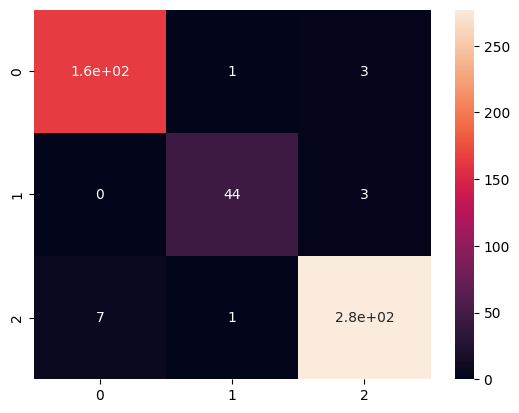

In [10]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_tf = confusion_matrix(variavel_predicao, modelo_tf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_tf, annot=True)

In [11]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_tf[0, 0] / sum(matriz_confusao_tf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_tf[0, 0] / sum(matriz_confusao_tf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_tf[1, 1] / sum(matriz_confusao_tf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_tf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_tf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  0.9761904761904762 

Precisão (Precision):  0.9590643274853801 

Especificidade (Specificity):  0.9361702127659575 

F1 Macro:  0.9630467647449068 

F1 Micro:  0.97


### IDF

In [12]:
dados_treino_idf = dados_treino_idf.replace(np.nan, 0)

variaveis_preditoras = dados_treino_idf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values

variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo de Regressão Logística:
modelo_idf = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
modelo_idf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_regressao_logistica = modelo_idf.predict(variaveis_preditoras)

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_idf = cross_val_score(modelo_idf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_idf)
print('\nMédia dos resultados:', np.mean(resultado_idf))
print('\nPredições feitas:\n', predicao_regressao_logistica)

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Resultados do modelo:
 [0.46666667 0.73333333 0.73333333 0.66666667 0.8        0.66666667
 0.6        0.66666667 0.6        0.6       ]

Média dos resultados: 0.6533333333333332

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'neutral' 'positive'
 

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusão:


<AxesSubplot: >

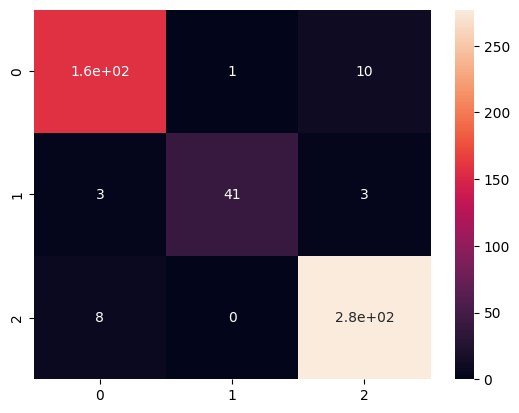

In [14]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_idf = confusion_matrix(variavel_predicao, modelo_idf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_idf, annot=True)

In [15]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_idf[0, 0] / sum(matriz_confusao_idf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_idf[0, 0] / sum(matriz_confusao_idf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_idf[1, 1] / sum(matriz_confusao_idf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  0.9345238095238095 

Precisão (Precision):  0.9345238095238095 

Especificidade (Specificity):  0.8723404255319149 

F1 Macro:  0.9397834616667055 

F1 Micro:  0.9500000000000001


### TF-IDF

In [16]:
variaveis_preditoras = dados_treino_tf_idf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values

variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo de Regressão Logística:
modelo_tf_idf = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
modelo_tf_idf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_regressao_logistica = modelo_tf_idf.predict(variaveis_preditoras)

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_tf_idf = cross_val_score(modelo_idf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_tf_idf)
print('\nMédia dos resultados:', np.mean(resultado_tf_idf))
print('\nPredições feitas:\n', predicao_regressao_logistica)

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Resultados do modelo:
 [0.6        0.8        0.66666667 0.73333333 0.86666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667]

Média dos resultados: 0.7

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'positive' 'neutral' 'positive'
 'positive' 'pos

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusão:


<AxesSubplot: >

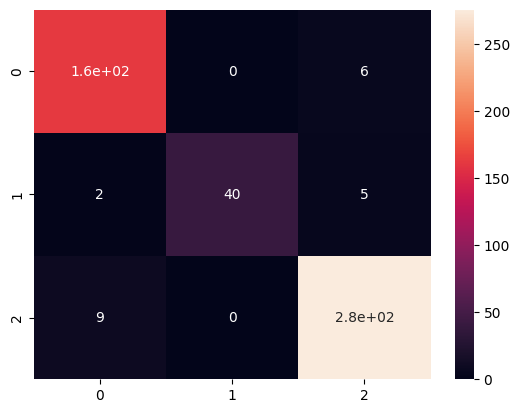

In [18]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_tf_idf = confusion_matrix(variavel_predicao, modelo_idf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_tf_idf, annot=True)

In [19]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_tf_idf[0, 0] / sum(matriz_confusao_tf_idf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_tf_idf[0, 0] / sum(matriz_confusao_tf_idf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_tf_idf[1, 1] / sum(matriz_confusao_tf_idf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  0.9642857142857143 

Precisão (Precision):  0.9364161849710982 

Especificidade (Specificity):  0.851063829787234 

F1 Macro:  0.9449072741620016 

F1 Micro:  0.956


## Modelo Naive Bayes

### TF

In [20]:
# Separação dos dados para teste e treino:
variaveis_preditoras = dados_treino_tf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values
variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo Naive Bayes:
modelo_tf = MultinomialNB(alpha=0.01, fit_prior=True)
modelo_tf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_naive_bayes = modelo_tf.predict(variaveis_preditoras)

# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_tf = cross_val_score(modelo_idf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_tf)
print('\nMédia dos resultados:', np.mean(resultado_tf))
print('\nPredições feitas:\n', predicao_naive_bayes)

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Resultados do modelo:
 [0.6        0.93333333 0.93333333 0.6        0.93333333 0.8
 0.8        0.73333333 0.6        0.6       ]

Média dos resultados: 0.7533333333333332

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'neutral' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'neutral' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'positive' 'neutral' 'positive'
 'positive

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusão:


<AxesSubplot: >

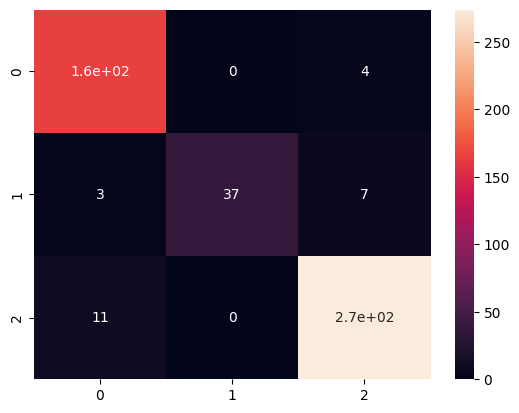

In [21]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_tf = confusion_matrix(variavel_predicao, modelo_idf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_tf, annot=True)

In [22]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_tf[0, 0] / sum(matriz_confusao_tf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_tf[0, 0] / sum(matriz_confusao_tf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_tf[1, 1] / sum(matriz_confusao_tf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  0.9761904761904762 

Precisão (Precision):  0.9213483146067416 

Especificidade (Specificity):  0.7872340425531915 

F1 Macro:  0.9301109227790092 

F1 Micro:  0.9500000000000001


### IDF

In [23]:
dados_treino_idf = dados_treino_idf.replace(np.nan, 0)

# Separação dos dados para teste e treino:
variaveis_preditoras = dados_treino_idf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values
variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo Naive Bayes:
modelo_idf = MultinomialNB(alpha=0.01, fit_prior=True)
modelo_idf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_naive_bayes = modelo_idf.predict(variaveis_preditoras)

# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_idf = cross_val_score(modelo_idf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_idf)
print('\nMédia dos resultados:', np.mean(resultado_idf))
print('\nPredições feitas:\n', predicao_naive_bayes)

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Resultados do modelo:
 [0.26666667 0.73333333 0.53333333 0.53333333 0.6        0.4
 0.46666667 0.46666667 0.46666667 0.33333333]

Média dos resultados: 0.48

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'neutral' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'neutral' 'neutral' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'neutral' 'positive'
 'positive' 'positive' 'p

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusão:


<AxesSubplot: >

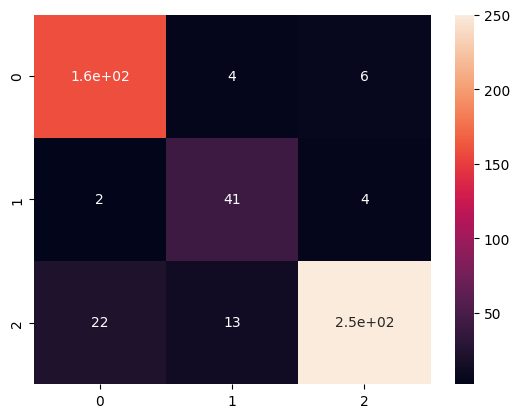

In [24]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_idf = confusion_matrix(variavel_predicao, modelo_idf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_idf, annot=True)

In [25]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_idf[0, 0] / sum(matriz_confusao_idf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_idf[0, 0] / sum(matriz_confusao_idf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_idf[1, 1] / sum(matriz_confusao_idf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  0.9404761904761905 

Precisão (Precision):  0.8681318681318682 

Especificidade (Specificity):  0.8723404255319149 

F1 Macro:  0.867080238823358 

F1 Micro:  0.898


### TF-IDF

In [26]:
# Separação dos dados para teste e treino:
variaveis_preditoras = dados_treino_tf_idf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values
variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo Naive Bayes:
modelo_tf_idf = MultinomialNB(alpha=0.01, fit_prior=True)
modelo_tf_idf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_naive_bayes = modelo_tf_idf.predict(variaveis_preditoras)

# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_tf_idf = cross_val_score(modelo_idf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_tf_idf)
print('\nMédia dos resultados:', np.mean(resultado_tf_idf))
print('\nPredições feitas:\n', predicao_naive_bayes)

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Resultados do modelo:
 [0.26666667 0.73333333 0.6        0.53333333 0.53333333 0.46666667
 0.53333333 0.46666667 0.4        0.4       ]

Média dos resultados: 0.49333333333333335

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'negative' 'neutral' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'neutral' 'negative' 'positive' 'positive'
 'negative' 'neutral' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'neutral' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'positive' 'neutral' 'positive'
 '

/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusão:


<AxesSubplot: >

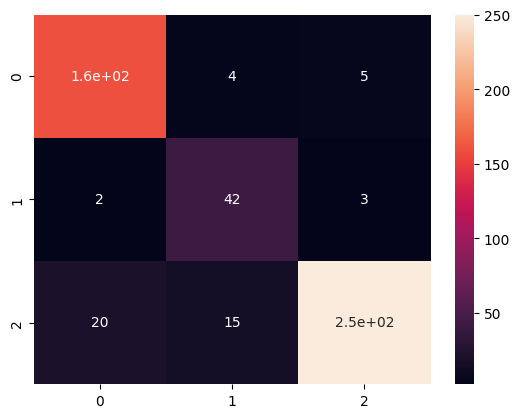

In [27]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_tf_idf = confusion_matrix(variavel_predicao, modelo_idf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_tf_idf, annot=True)

In [28]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_tf_idf[0, 0] / sum(matriz_confusao_tf_idf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_tf_idf[0, 0] / sum(matriz_confusao_tf_idf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_tf_idf[1, 1] / sum(matriz_confusao_tf_idf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  0.9464285714285714 

Precisão (Precision):  0.8784530386740331 

Especificidade (Specificity):  0.8936170212765957 

F1 Macro:  0.8699209586511901 

F1 Micro:  0.902
